In [1]:
from GAM import *
from utilities import *
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.mplot3d import Axes3D
import scipy.spatial.distance as dist

For this example, we will pretend the genome is static. Load a single structure (in this case a random walk polymer), and center it

In [4]:
structure = random_walk(length=1000)
structure = center_structure(structure)
pickle.dump(structure, open('myrandomwalk.pkl', 'wb'))

Show the structure

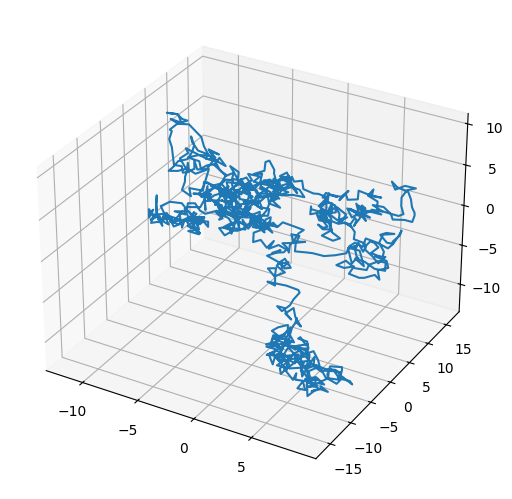

In [5]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.projection = '3d'
ax.plot(*structure.T)

Create a GAM configuration object. This object contains the parameters of the experiment

In [6]:
g = GAM(slice_width=5)

Illustrate what a nuclear profile of your structure would look like with the current GAM configuration

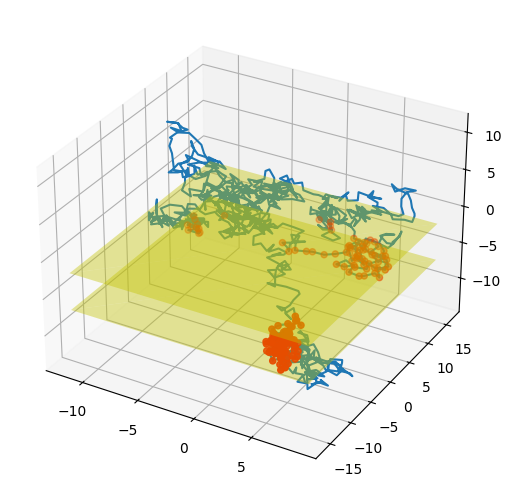

In [10]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.projection = '3d'
ax.plot(*structure.T)
sectioned = g.illustrate_NP(ax, structure)

Run the experiment with 1000 NPs

In [11]:
run = g.run(["myrandomwalk.pkl"], len(structure), NPs=1000)

View the results

Text(0.5, 1.0, 'Distance map')

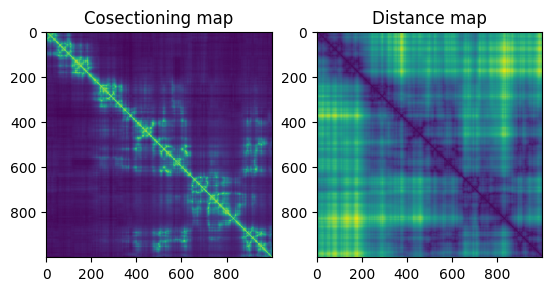

In [12]:
fig, [ax1, ax2] = plt.subplots(1,2)

ax1.imshow(run["results"]["normalized_cosectioning"], cmap='viridis')
ax1.set_title("Cosectioning map")
ax2.imshow(dist.cdist(structure, structure))
ax2.set_title("Distance map")